In [ ]:
'''
В рамках проекта этого модуля вам будет необходимо научиться по результатам опроса, который авиакомпания проводит после полёта, предсказывать удовлетворённость пассажиров услугами авиакомпании и совершённым перелётом.

После перелёта пассажир заполнял анкету, которая состоит из различных вопросов про условия на борту самолёта и качество предоставленных услуг. Последний вопрос в анкете был сформулирован таким образом: оцените свою удовлетворённость совершённым перелётом.
Задача состоит в том, чтобы на основе того, как пассажир отвечал на остальные вопросы анкеты, предсказать, остался он удовлетворён полётом или нет. Данная задача является классической задачей бинарной классификации, и решить её предлагается с помощью модели логистической регрессии.

Всего в данных представлены результаты 129 880
 опросов.
'''

In [ ]:
'''
Данные для решения проектной задачи представляются в виде таблицы (data.csv).

Для предсказания удовлетворённости пассажира полётом используются следующие факторы (в скобках указаны их типы и возможные значения):

Gender — пол пассажира (бинарный: Female — женский, Male — мужской).
Customer Type — тип пассажира (категориальный: Loyal customer — лояльный, disloyal Customer — не лояльный).
Age — возраст пассажира (численный).
Type of Travel — цель поездки (бинарный: Personal Travel — личная поездка, Business Travel — рабочая поездка).
Class — класс полёта (категориальный: Business — бизнес-класс, Eco — эконом, Eco Plus — эконом-плюс).
Flight distance — длина перелёта (численный).
Inflight wifi service — удовлетворённость сетью Wi-Fi на борту самолёта (численный: 1–5 или 0, если не оценивался).
Departure/Arrival time convenient — удовлетворённость временем вылета/прилёта (численный: 1–5 или 0, если не оценивался).
Ease of Online booking — удовлетворённость удобством онлайн-бронирования билетов (численный: 1–5 или 0, если не оценивался).
Gate location — удовлетворённость расположением выходов на посадку (численный: 1–5 или 0, если не оценивался).
Food and drink — удовлетворённость питанием на борту (численный: 1–5 или 0, если не оценивался).
Online boarding — удовлетворённость удобством онлайн-регистрации на рейс (численный: 1–5 или 0, если не оценивался).
Seat comfort — удовлетворённость удобством мест в самолёте (численный: 1–5 или 0, если не оценивался).
Inflight entertainment — удовлетворённость уровнем развлечений на борту самолёта (численный: 1–5 или 0, если не оценивался).
On-board service — удовлетворённость уровнем обслуживания на борту самолёта (численный: 1–5 или 0, если не оценивался).
Leg room service — удовлетворённость местом для ног перед сиденьем (численный: 1–5 или 0, если не оценивался).
Baggage handling — удовлетворённость обращением с багажом (численный: 1–5 или 0, если не оценивался).
Checkin service — удовлетворённость обслуживанием на стойке регистрации (численный: 1–5 или 0, если не оценивался).
Cleanliness — удовлетворённость чистотой в самолёте (численный: 1–5 или 0, если не оценивался).
Departure Delay in Minutes — задержка отправления самолёта в минутах (численный: 1–5 или 0, если не оценивался).
Arrival Delay in Minutes — задержка прибытия самолёта в минутах (численный: 1–5 или 0, если не оценивался).
Предсказываемая характеристика:

satisfaction — удовлетворённость полётом (бинарный: False — пассажир остался не удовлетворён полётом, True — пассажир остался удовлетворён полётом).
'''

In [1]:
!pip3 install pandas
!pip3 install seaborn
!pip3 install numpy
!pip3 install scikit-learn

In [36]:
import pandas as pd
import seaborn as sns
import numpy as np

In [37]:
data = pd.read_csv('data.csv', sep=',')

data['grade'] = data['satisfaction'].astype(int)

In [38]:
sns.set(rc={'figure.figsize': (11.7, 8.27)})

In [39]:
print('All ', len(data))
print('No wifi ', len(data[data['Inflight wifi service'] == 0]))
print('No food ', len(data[data['Food and drink'] == 0]))
print('No time ', len(data[data['Departure/Arrival time convenient'] == 0]))
print('No seat ', len(data[data['Seat comfort'] == 0]))
print('No boarding ', len(data[data['Online boarding'] == 0]))
print('No fun ', len(data[data['Inflight entertainment'] == 0]))
print('No depart delay ', len(data[data['Departure Delay in Minutes'] == 0]))
print('No arrival delay ', len(data[data['Arrival Delay in Minutes'] == 0]))


All  129880
No wifi  3916
No food  132
No time  6681
No seat  1
No boarding  3080
No fun  18
No depart delay  73356
No arrival delay  72753


In [40]:
frequency = data['Departure Delay in Minutes'].value_counts()
print(frequency)

Departure Delay in Minutes
0      73356
1       3682
2       2855
3       2535
4       2309
       ...  
626        1
460        1
600        1
514        1
530        1
Name: count, Length: 466, dtype: int64


In [41]:
frequency = data['Arrival Delay in Minutes'].value_counts()
print(frequency)

Arrival Delay in Minutes
0.0      72753
1.0       2747
2.0       2587
3.0       2442
4.0       2373
         ...  
604.0        1
457.0        1
459.0        1
502.0        1
333.0        1
Name: count, Length: 472, dtype: int64


<Axes: xlabel='Departure Delay in Minutes', ylabel='Count'>

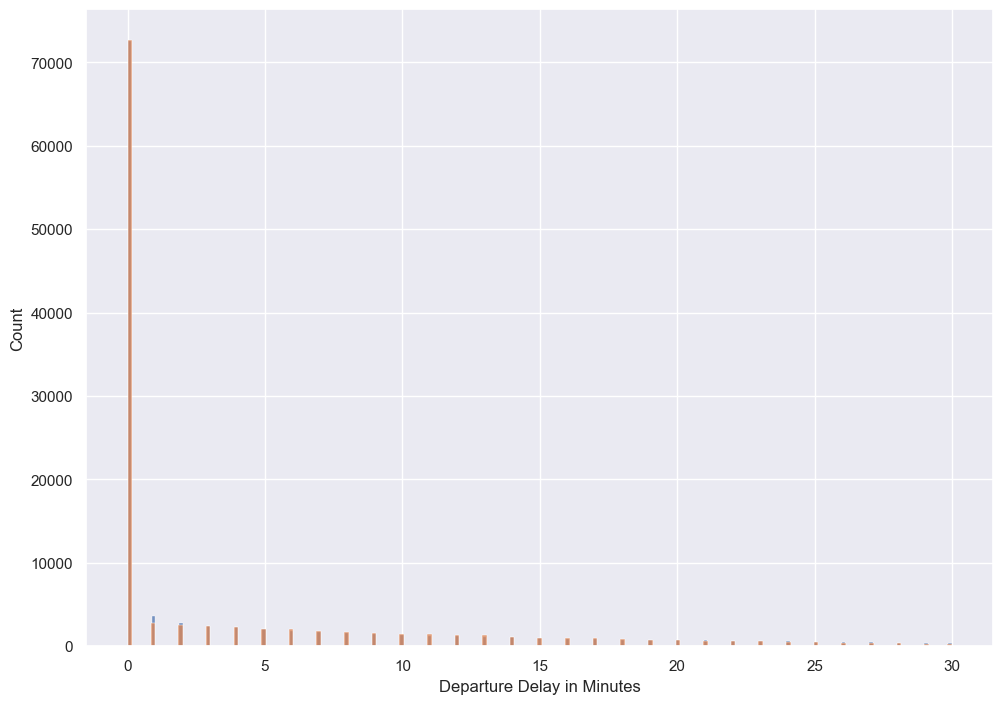

In [42]:
filtered_data = data[(data['Departure Delay in Minutes'] <= 30) & (data['Arrival Delay in Minutes'] <= 30)]
sns.histplot(filtered_data['Departure Delay in Minutes'])
sns.histplot(filtered_data['Arrival Delay in Minutes'])

In [44]:
print(len(data))
print(len(filtered_data))

129880
108342


<Axes: xlabel='log departure delay', ylabel='Count'>

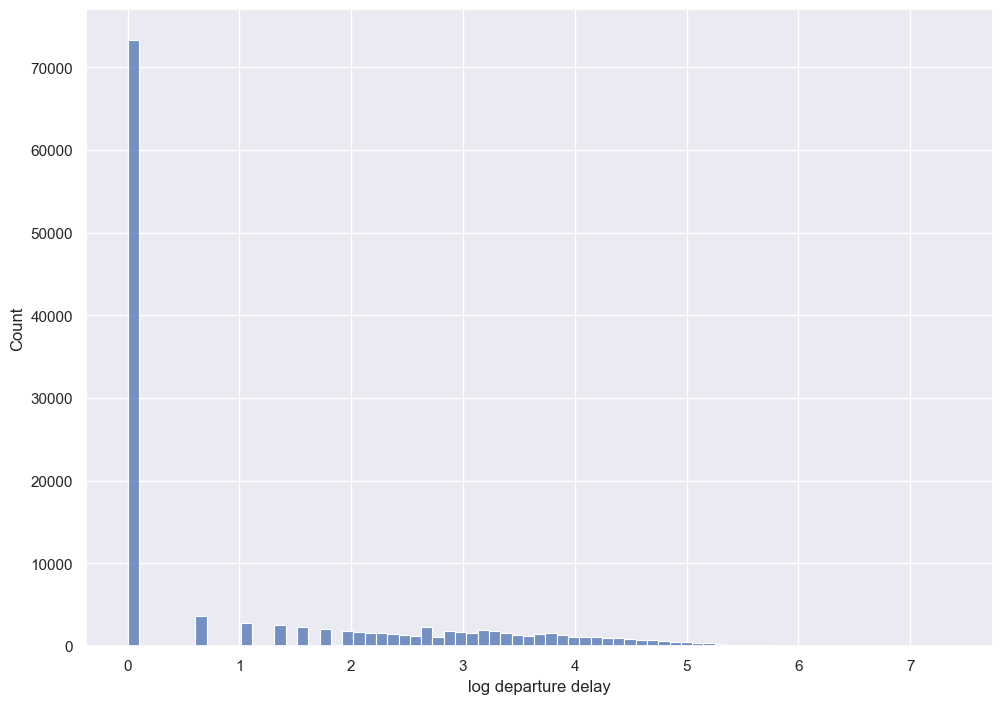

In [ ]:
log_departure_delay = np.log1p(data['Departure Delay in Minutes']) # ln (1 + x)
sns.histplot(log_departure_delay)

<Axes: xlabel='log arrival delay', ylabel='Count'>

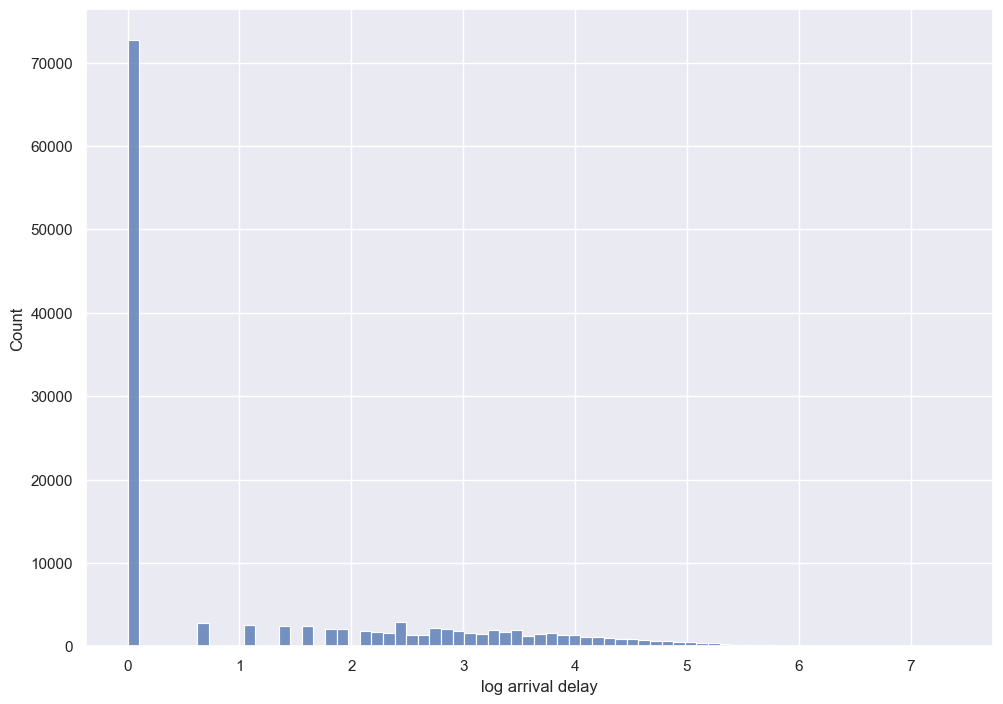

In [ ]:
log_arrival_delay = np.log1p(data['Arrival Delay in Minutes']) # ln (1 + x)
sns.histplot(log_arrival_delay)

In [50]:
# Employ binning to deal with outliers

bins = [0, 10, 30, 60, float('inf')]
labels = ['None', 'Low', 'Medium', 'High']

data['binned Departure Delay'] = pd.cut(data['Departure Delay in Minutes'], bins=bins, labels=labels)
data['binned Arrival Delay'] = pd.cut(data['Arrival Delay in Minutes'], bins=bins, labels=labels)

<Axes: xlabel='binned Departure Delay', ylabel='Count'>

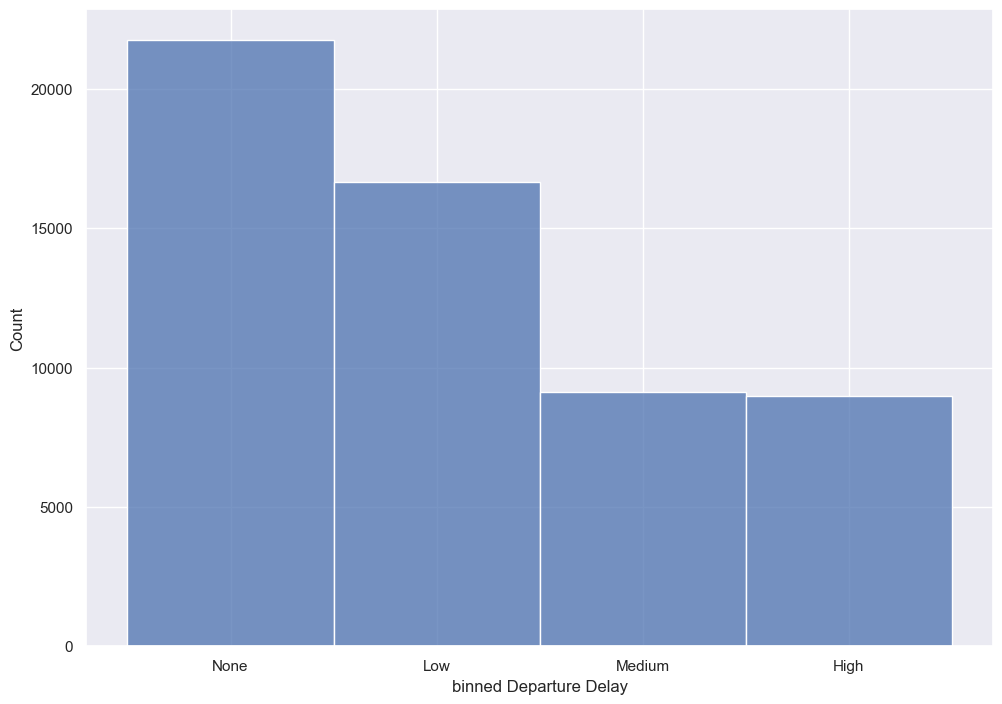

In [52]:
sns.histplot(data['binned Departure Delay'])

<Axes: xlabel='binned Arrival Delay', ylabel='Count'>

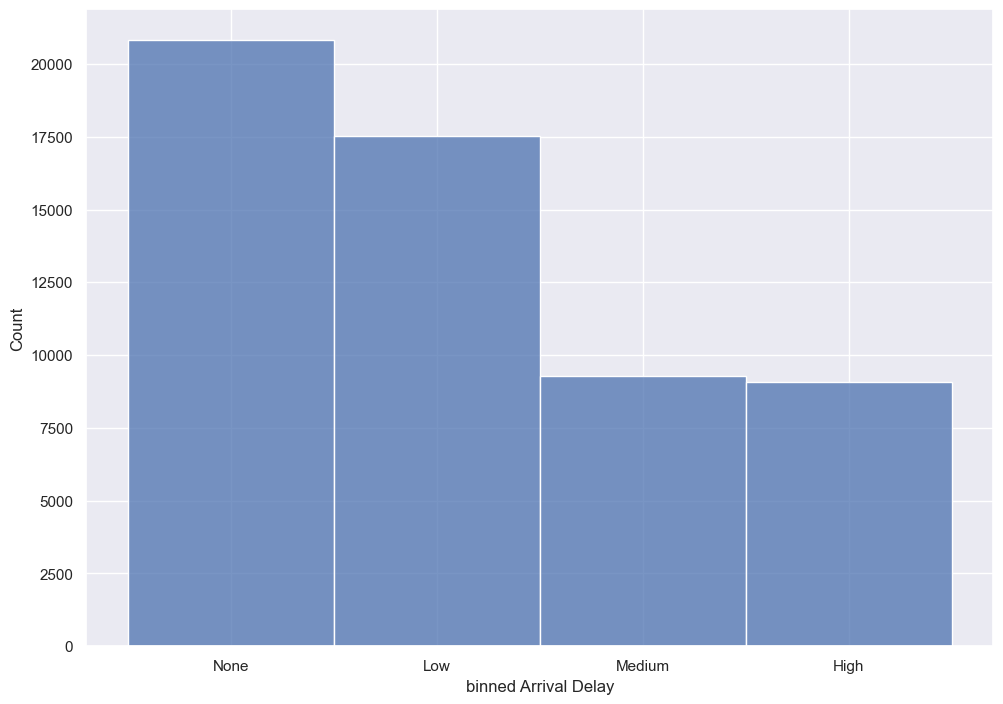

In [53]:
sns.histplot(data['binned Arrival Delay'])

In [54]:
X = data.drop(columns=['satisfaction', 'grade'])
y = data['grade']
print(len(y))

129880
